# 1. Matrix Factorization for Network Embedding ( From previous report)

(34, 34)
(34,)


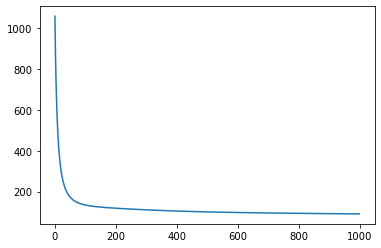

In [1]:
import pandas as pd
import numpy as np
import random
import networkx as nx
from matplotlib import pyplot as plt 
np.random.seed(15)


#Load data
adjlist = nx.read_adjlist("karate_club.adjlist", nodetype=int)
karate_label = np.loadtxt("karate_label.txt")
Graph = nx.read_adjlist("karate_club.adjlist", nodetype=int)
node_number = nx.to_pandas_adjacency(Graph).columns


adj = nx.to_numpy_array(adjlist)
label = karate_label[:,-1]

print(adj.shape)
print(label.shape)

#match the label
fix_label = []
for i in node_number:
    tem = karate_label[i][-1]
    fix_label.append(tem)
    
    
#defining P, Q for matrix factorizaiton
d= 4
P = np.random.random((4,34))
Q = np.random.random((4,34))


zuzv = np.dot(P.T,Q)
zuzv.shape


# loss function
def loss(a,b):
    return np.sum((a-b)**2)


loss(zuzv,adj)

epoch = 1000
lr = 0.001

#Updating params 
loss_list = [0 for _ in range(epoch)]
for i in range(epoch):
    P -= lr *  np.dot(zuzv-adj,Q.T).T
    Q -= lr *  np.dot(zuzv-adj,P.T).T
    
    
    loss_list[i] = loss(zuzv,adj)
    zuzv = np.dot(P.T,Q)
    
    
#plotting the loss
plt.plot(loss_list)

# T-SNE (From previous report)

- the membership number are located nearly when they have many relationship 
- it differs quite a lot when perplexity changes
- unlike the figure, label doesn't mean anyting (expressed by the color) 

In [2]:
ans = np.dot(adj,P.T)

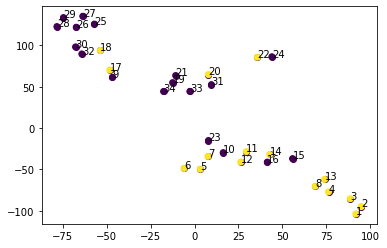

In [3]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

model = TSNE(learning_rate=100,perplexity=5)
transformed = model.fit_transform(ans)
xs = transformed[:,0]
ys = transformed[:,1]

for i in range(len(xs)):
    plt.scatter(xs[i],ys[i],c = node_number[i])
    plt.text(xs[i],ys[i],i+1)
plt.scatter(xs,ys,c=label)
#plt.text(xs,ys)

plt.show()


In [4]:
# define data_x, label y
x_data = ans
t_data = np.array(label).reshape(34,1)
print(x_data.shape)
print(t_data.shape)

(34, 4)
(34, 1)


# Functions

In [5]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
    
def loss_func(x, t):
    delta = 1e-7
    z=np.dot(x,w)+b
    y=sigmoid(z)
    return -np.sum(t*np.log(y+delta)+(1-t)*np.log((1-y)+delta))

In [6]:
def numerical_derivative(f, x):
    delta_x = 1e-4 
    grad = np.zeros_like(x) # cal grads
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    
    while not it.finished:
        idx=it.multi_index
        
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + delta_x
        fx1 = f(x)
        
        x[idx] = tmp_val - delta_x
        fx2 = f(x)
        
        grad[idx] = (fx1 - fx2) / (2*delta_x)
        
        x[idx] = tmp_val
        it.iternext()
        
    return grad

def predict(x):
    z = np.dot(x,w) + b
    y = sigmoid(z)
    
    if y > 0.5: #0.5를 초과하면 1로 True, 이하면 0으로 False
        result = 1
    else:
        result = 0
        
    return result

In [7]:
#Param Setting
learning_rate = 1e-2
f = lambda x : loss_func(x_data, t_data)


## Running 10 Times with different portion of labeled data

In [10]:
np.random.seed(2)
#Param Setting
learning_rate = 1e-2
# GET 10 time results
right_10 = []
accuracy_10 = []
precision_10 = []
recall_10 = []
f1_10 = []

# define data_x, label y
x_data = ans
t_data = np.array(label).reshape(34,1)
total = np.concatenate([x_data,t_data],axis = 1)

#Portion setting
portion_set = [0.05,0.15,0.25,0.35,0.45,0.55,0.65]
portion_f1 = []
for pro in portion_set:
    for _ in range(10):
    
        #Shuffle Data
        np.random.shuffle(total)
        x_data = total[:,:-1]
        t_data = total[:,-1]
        t_data = np.array(t_data).reshape(34,1)
    
        #Data Split
        portion = pro
        tem = int(34 * portion)
        x_test = x_data[34-tem:]
        t_test = t_data[34-tem:]

        x_data = x_data[:34-tem]
        t_data = t_data[:34-tem]
    
        #initalizing
        w = np.random.rand(4,1)
        b = np.random.rand(1)
    
    
        loss = []
        for step in range(10000):
            w -= learning_rate *numerical_derivative(f,w)
            b -= learning_rate *numerical_derivative(f,b)
            if(step%10==0):
                l = loss_func(x_data, t_data)
                loss.append(l)
    
        #make prediction
        pred = []
        for i in range(len(x_test)):
            tem = predict(x_test[i])
            pred.append(tem) 
        
        
        #prediction
        y = t_test
        y= y.flatten()
        p = np.array(pred) 


        accuracy = np.mean(np.equal(y,p))
        right = np.sum(y * p == 1)
        precision = right / np.sum(p)
        recall = right / np.sum(y)
        f1 = 2 * precision*recall/(precision+recall)

        accuracy_10.append(accuracy)
        right_10.append(right)
        precision_10.append(precision)
        recall_10.append(recall)
        f1_10.append(f1)
        
    portion_f1.append(np.mean(np.array(f1)))
    
print('accuracy',np.mean(np.array(accuracy)))
print('precision', np.mean(np.array(precision)))
print('recall', np.mean(np.array(recall)))
print('f1', np.mean(np.array(f1)))

<ipython-input-10-beec23f5ec73>:66: RuntimeWarning: invalid value encountered in true_divide
  recall = right / np.sum(y)
<ipython-input-10-beec23f5ec73>:65: RuntimeWarning: invalid value encountered in long_scalars
  precision = right / np.sum(p)
<ipython-input-10-beec23f5ec73>:67: RuntimeWarning: invalid value encountered in double_scalars
  f1 = 2 * precision*recall/(precision+recall)


accuracy 0.5909090909090909
precision 0.5454545454545454
recall 0.6
f1 0.5714285714285713


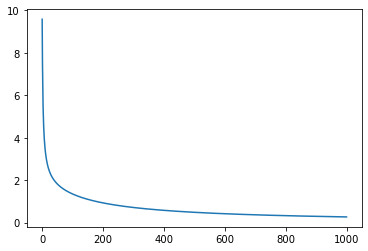

In [11]:
#sample loss
plt.plot(loss)

### Results
+ Loss decreases and gather at some point
+ f1 score have high variance
+ it seems to have high variance due to the random sampling (sample size is too small)

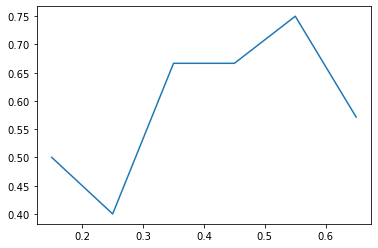

In [12]:
#Plotting f1 score with different portion
plt.plot(portion_set, portion_f1)